### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)


In [59]:
tf.__version__


'1.12.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [62]:
print(testY[0:5])

[9 2 1 1 6]


In [63]:
print(trainX[0:1])
print(trainX.shape)

[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73
     0   0   1   4   0   0   0   0   1   1   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127
    62  54   0   0   0   1   3   4   0   0   3]
  [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176
   134 144 123  23   0   0   0   0  12  10   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207
   178 107 156 161 109  64  23  77 130  72  15]
  [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218
   216 216 163 127 121 122 146 141  88 172  66]
  [  0   0   0   0   0   0   0   0   0   1   1  

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [64]:
trainY = tf.keras.utils.to_categorical(trainY)
print(trainY.shape)

(60000, 10)


In [65]:
testY=tf.keras.utils.to_categorical(testY)
print(testY.shape)

(10000, 10)


In [66]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

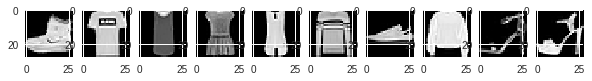

In [67]:
import numpy as np
import matplotlib.pyplot as plt


fig=plt.figure(figsize=(10, 1))
columns = 10
rows = 1
for i in range(1, columns*rows+1):
    grid_data = trainX[i-1].reshape(28,28)
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(grid_data, interpolation="none", cmap = "gray")
plt.show()

In [68]:
#labels
#The [0][0] indexing is just to ditch the structure (a tuple with an array) returned by np.where
[np.where(r==1)[0][0] for r in trainY[0:10]]

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
#shape is 3 dimensions last space is for the number of inputs, this the placeholder
#if its a colored image we can give four dimension ex: (28,28,3,)... there is only one pixel for gray scale(28,28,1,)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))



#Add Dense Layer which provides 10 Outputs after applying softmax, change it to sigmoid if the categories are 2(yes/no) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model #categorical crossentropy when we have muultiple categories #loss keras gives by default on fitting but if u also want to get accuracy, you can specify in metrics.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [70]:
#epochs is the number of iterations
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 110us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/30
60000/60000 [==============================] - 7s 109us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/30
60000/60000 [==============================] - 6s 108us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/30
60000/60000 [==============================] - 7s 119us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/30
60000/60000 [==============================] - 7s 113us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/30
60000/60000 [==============================] - 6s 107us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/30
60000/60000 [==============================] - 6s 107us/step - loss: 14.5063 - acc: 0.1000 - val_lo

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data #might not be needed, as this case already has the data in the range 0-255, which is the purpose of normalisation.
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax, change it to sigmoid if the categories are 2(yes/no) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))



#Compile the model #categorical crossentropy when we have muultiple categories #loss keras gives by default on fitting but if u also want to get accuracy, you can specify in metrics.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [72]:
model.fit(trainX, trainY, 
          epochs=30,validation_data=(testX,testY),
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.4086 - acc: 0.8552 - val_loss: 0.4592 - val_acc: 0.8420
Epoch 2/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.4112 - acc: 0.8547 - val_loss: 0.4769 - val_acc: 0.8363
Epoch 3/30
60000/60000 [==============================] - 7s 121us/step - loss: 0.4086 - acc: 0.8567 - val_loss: 0.4683 - val_acc: 0.8413
Epoch 4/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.4083 - acc: 0.8576 - val_loss: 0.4630 - val_acc: 0.8411
Epoch 5/30
60000/60000 [==============================] - 7s 123us/step - loss: 0.4070 - acc: 0.8570 - val_loss: 0.4769 - val_acc: 0.8393
Epoch 6/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.4074 - acc: 0.8559 - val_loss: 0.4595 - val_acc: 0.8418
Epoch 7/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.4086 - acc: 0.8561 - val_loss: 0.4671 - 

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:

#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data #might not be needed, as this case already has the data in the range 0-255, which is the purpose of normalisation.
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax, change it to sigmoid if the categories are 2(yes/no) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model #categorical crossentropy when we have muultiple categories #loss keras gives by default on fitting but if u also want to get accuracy, you can specify in metrics.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])



#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)


#Compile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=30,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 122us/step - loss: 0.9232 - acc: 0.6898 - val_loss: 0.6972 - val_acc: 0.7616
Epoch 2/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.6467 - acc: 0.7792 - val_loss: 0.6146 - val_acc: 0.7897
Epoch 3/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.5896 - acc: 0.7994 - val_loss: 0.5794 - val_acc: 0.8021
Epoch 4/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.5605 - acc: 0.8079 - val_loss: 0.5526 - val_acc: 0.8102
Epoch 5/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.5379 - acc: 0.8159 - val_loss: 0.5381 - val_acc: 0.8138
Epoch 6/30
60000/60000 [==============================] - 7s 120us/step - loss: 0.5248 - acc: 0.8194 - val_loss: 0.5330 - val_acc: 0.8167
Epoch 7/30
60000/60000 [==============================] - 7s 118us/step - loss: 0.5167 - acc: 0.8224 - val_loss: 0.5222 - 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model1 = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

#Add 1st hidden layer
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model1.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add OUTPUT layer
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model1.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [76]:
model1.fit(trainX,trainY,          
          epochs=30,
          batch_size=32)

Epoch 1/30
60000/60000 [==============================] - 8s 127us/step - loss: 0.2545 - acc: 0.9071
Epoch 2/30
60000/60000 [==============================] - 8s 128us/step - loss: 0.2502 - acc: 0.9085
Epoch 3/30
60000/60000 [==============================] - 9s 145us/step - loss: 0.2471 - acc: 0.9100
Epoch 4/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.2443 - acc: 0.9100
Epoch 5/30
60000/60000 [==============================] - 8s 126us/step - loss: 0.2411 - acc: 0.9127
Epoch 6/30
60000/60000 [==============================] - 7s 125us/step - loss: 0.2369 - acc: 0.9139
Epoch 7/30
60000/60000 [==============================] - 7s 125us/step - loss: 0.2336 - acc: 0.9141
Epoch 8/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.2303 - acc: 0.9154
Epoch 9/30
60000/60000 [==============================] - 7s 124us/step - loss: 0.2283 - acc: 0.9160
Epoch 10/30
60000/60000 [==============================] - 8s 125us/step - loss: 0.2240 - a

## Review model

In [77]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [78]:
model1.evaluate(testX,testY)

10000/10000 [==============================] - 1s 68us/step


[0.3410659310221672, 0.8873]

In [0]:
predicted_classes = model1.predict_classes(testX,verbose=0)

In [80]:
predicted_classes.shape, testY.shape

((10000,), (10000, 10))

In [81]:
#converting testY from (10000,10) to (10000,)
test_data_labels = [np.where(r==1)[0][0] for r in testY[:]]
test_labels = np.asarray(pred)
test_labels.shape

(10000,)

In [84]:
count=0
for i in range(0,len(test_labels)):
  if(test_labels[i]==predicted_classes[i]):
    count+=1
"There are {} correct predictions out of {}".format(count,10000)


'There are 8873 correct predictions out of 10000'

In [83]:
import pandas as pd
pd.DataFrame(test_labels, predicted_classes)

,0
9,9
2,2
1,1
1,1
6,6
1,1
4,4
6,6
5,5
7,7
